In [11]:
import gspread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Lương CSKH C2C_T4_26.04.xlsx','File Data')
df

,Tháng,Năm,Tên tài khoản,Vị trí,Mô tả vị trí,Loại hợp đồng,Họ và tên,Miền,Tỉnh,Kho,...,Lương lễ thử việc,Lương phép thử việc,Lương Phép,Lương Lễ,Lương Tăng Ca Thử Việc,Lương Tăng Ca Chính Thức,Lương Thử Việc,Lương Đảm Bảo,Lương Theo Kpi,Lương Chốt
0,4,2023,myltb,C2C Chat,Dịch vụ khách hàng C2C,definite_24,LÂM THỊ BÉ MY,MN,Cà Mau,BC Huỳnh Thúc Kháng,...,0,0.0,0.000000,0,0.0,6.162963e+05,0.0,4.160000e+06,8.700000e+06,9.316296e+06
1,4,2023,nhungnth44,C2C Chat,Dịch vụ khách hàng C2C,definite_24,NGUYỄN THỊ HỒNG NHUNG,MB,Bắc Ninh,Thị Cầu,...,0,0.0,308148.148148,0,0.0,7.703704e+05,0.0,4.016552e+06,1.255172e+07,1.363024e+07
2,4,2023,anhttm5,C2C Chat,Dịch vụ khách hàng C2C,indefinite,TRẦN THỊ MINH ANH,HCM,TP Hồ Chí Minh,Tân Bình,...,0,0.0,0.000000,0,0.0,1.300000e+06,0.0,4.600000e+06,1.243376e+07,1.373376e+07
3,4,2023,haotth2,C2C Chat,Dịch vụ khách hàng C2C,definite_24,TRƯƠNG THỊ HOÀ HẢO,MN,Đắk Lắk,Cư Kuin,...,0,0.0,120370.370370,0,0.0,1.805556e+05,0.0,3.131818e+06,5.878182e+06,6.179108e+06
4,4,2023,huyenlt17,C2C Chat,Dịch vụ khách hàng C2C,definite_24,LÊ THỊ HUYỀN,MB,Nghệ An,LV - Vinh 1,...,0,0.0,77037.037037,0,0.0,7.703704e+05,0.0,4.016552e+06,1.428966e+07,1.513706e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,4,2023,hongct10,C2C Chat,Dịch vụ khách hàng C2C,definite_24,CHU THỊ HỒNG,HN,Hà Nội,BC Kiều Mai (HN),...,0,0.0,86666.666667,0,0.0,1.213333e+06,0.0,4.599310e+06,1.434828e+07,1.564828e+07
78,4,2023,lanvt12,C2C Chat,Dịch vụ khách hàng C2C,definite,VŨ THỊ LAN,HN,Hà Nội,Kho Yên Nghĩa,...,0,0.0,0.000000,0,0.0,8.666667e+05,0.0,4.594909e+06,7.461818e+06,8.328485e+06
79,4,2023,giangnnt2,C2C Chat,Dịch vụ khách hàng C2C,definite,NGUYỄN NHẬT TRÀ GIANG,HCM,TP Hồ Chí Minh,Quận 9,...,0,0.0,346666.666667,0,0.0,1.126667e+06,0.0,4.345714e+06,1.179286e+07,1.326619e+07
80,4,2023,namnph2,C2C Chat,Dịch vụ khách hàng C2C,definite_24,NGUYỄN PHẠM HOÀNG NAM,HCM,TP Hồ Chí Minh,Tân Bình,...,0,0.0,0.000000,0,0.0,1.040000e+06,0.0,4.680000e+06,1.510000e+07,1.614000e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tháng                         82 non-null     int64  
 1   Năm                           82 non-null     int64  
 2   Tên tài khoản                 82 non-null     object 
 3   Vị trí                        82 non-null     object 
 4   Mô tả vị trí                  82 non-null     object 
 5   Loại hợp đồng                 82 non-null     object 
 6   Họ và tên                     82 non-null     object 
 7   Miền                          82 non-null     object 
 8   Tỉnh                          82 non-null     object 
 9   Kho                           82 non-null     object 
 10  Ngày vào                      82 non-null     object 
 11  Ngày lương chuẩn              82 non-null     object 
 12  Công chuẩn                    82 non-null     float64
 13  Tổng cô

In [62]:
df.describe()

,Tháng,Năm,Công chuẩn,Tổng công,Tổng công chính thức,Tổng công thử việc,Tổng công tăng ca thử việc,Tổng công tăng ca chính thức,Nghỉ phép,Nghỉ lễ,...,Lương lễ thử việc,Lương phép thử việc,Lương Phép,Lương Lễ,Lương Tăng Ca Thử Việc,Lương Tăng Ca Chính Thức,Lương Thử Việc,Lương Đảm Bảo,Lương Theo Kpi,Lương Chốt
count,82.0,82.0,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.0,...,82.0,82.000000,82.000000,82.0,82.000000,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01
mean,4.0,2023.0,27.814024,28.716463,20.344512,4.664634,0.137195,3.570122,0.432927,0.0,...,0.0,1247.741644,71693.766938,0.0,17044.150858,5.981233e+05,1.125790e+06,3.230467e+06,6.809630e+06,9.230056e+06
std,0.0,0.0,0.702521,7.959171,11.449071,9.237957,0.500235,2.769508,0.688361,0.0,...,0.0,11298.781140,116350.352950,0.0,62772.899479,4.799422e+05,2.236673e+06,1.820204e+06,6.827685e+06,4.130041e+06
min,4.0,2023.0,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-3.277222e+07,0.000000e+00
25%,4.0,2023.0,27.000000,27.000000,10.250000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,1.918519e+06,5.416667e+04,5.857407e+06
50%,4.0,2023.0,28.000000,31.000000,27.000000,0.000000,0.000000,4.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,6.162963e+05,0.000000e+00,4.160000e+06,9.561453e+06,1.042075e+07
75%,4.0,2023.0,28.000000,33.375000,28.000000,0.000000,0.000000,6.000000,1.000000,0.0,...,0.0,0.000000,154074.074074,0.0,0.000000,1.040000e+06,0.000000e+00,4.517180e+06,1.097716e+07,1.234042e+07
max,4.0,2023.0,29.250000,37.500000,29.000000,28.000000,2.250000,9.500000,3.000000,0.0,...,0.0,102314.814815,520000.000000,0.0,294666.666667,1.646667e+06,7.259259e+06,4.680000e+06,1.533214e+07,1.614000e+07


# 1. Có sự khác biệt về mức lương giữa các miền và tỉnh không? Nếu có, thì miền và tỉnh nào có mức lương cao nhất và thấp nhất?

In [21]:
# Nhóm dữ liệu theo miền và tính mức lương trung bình cho mỗi nhóm
salary_by_region = df.groupby('Miền')['Lương Chốt'].mean()
# Sắp xếp miền theo mức lương trung bình giảm dần
salary_by_region = salary_by_region.sort_values(ascending=False)
#Format lại định dạng của tiền lương
for region, avg_salary in salary_by_region.items():
      salary_by_region[region] = '{:,.2f}'.format(avg_salary / 1000000)
# Chuyển từ điển thành DataFrame
df_1 = pd.DataFrame(list(salary_by_region.items()), columns=['Miền','Lương Trung Bình'])

df_1

,Miền,Lương Trung Bình
0,HCM,10.69
1,HN,9.60
2,MT,9.21
3,MB,8.43
4,MN,7.50


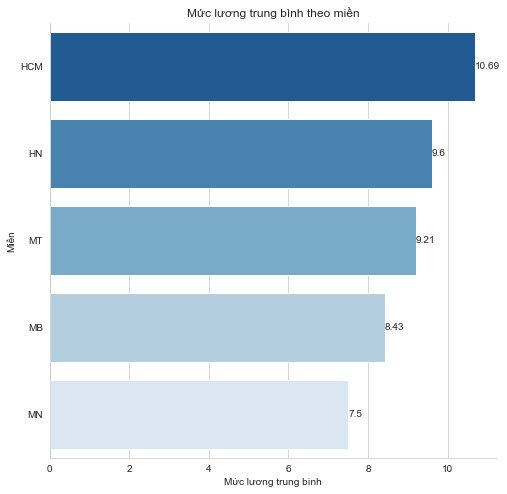

In [26]:
plt.figure(figsize=(8,8))
df_1['Lương Trung Bình'] = df_1['Lương Trung Bình'].astype(float)
# Vẽ biểu đồ cột ngang
sns.set_style('whitegrid')
ax = sns.barplot(x=df_1['Lương Trung Bình'], y=df_1['Miền'], orient='h', palette='Blues_r')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xlabel('Mức lương trung bình')
ax.set_ylabel('Miền')
ax.set_title('Mức lương trung bình theo miền')
sns.despine()

Ở HCM, mức lương trung bình cao nhất so với các miền khác, đây là trung tâm kinh tế của Việt Nam và có nền kinh tế phát triển, do đó, mức lương ở đây cao hơn so với các miền khác.

Trong khi đó, miền Nam Đông Bắc (MB) và miền Trung (MT) có mức lương trung bình thấp hơn so với HCM và HN. Điều này có thể do đây là những khu vực đang phát triển và chưa có nền kinh tế mạnh mẽ như HCM và HN.

Miền Nam (MN) có mức lương trung bình thấp nhất trong số các miền. Đây là miền đang phát triển chậm hơn so với các miền khác, và do đó, mức lương ở đây thấp hơn.

# 2.Tốc độ chat trung bình của các nhân viên là bao nhiêu? Có sự khác biệt về tốc độ chat giữa các kho khác nhau không?

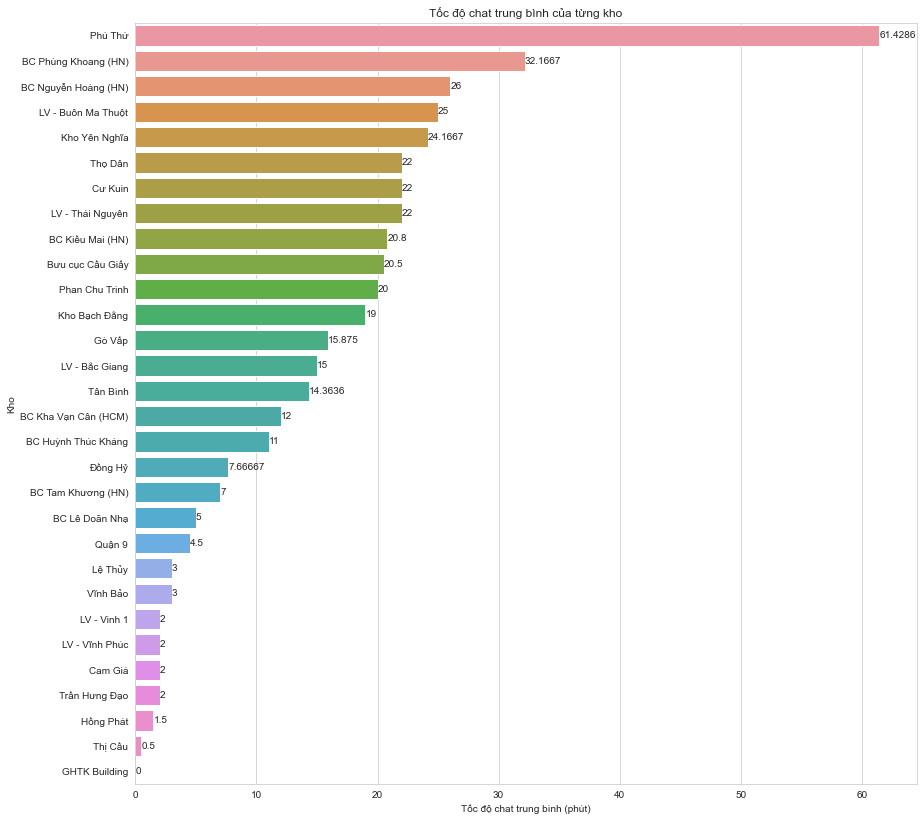

In [34]:
# Tính tốc độ chat trung bình của các nhân viên trong từng kho
avg_speed_by_warehouse = df.groupby('Kho')['Tốc độ chat trung bình'].mean()
avg_speed_by_warehouse_df = pd.DataFrame(list(avg_speed_by_warehouse.items()),columns=['Kho','Tốc độ chat trung bình'])
avg_speed_by_warehouse_df = avg_speed_by_warehouse_df.sort_values(by = 'Tốc độ chat trung bình',ascending= False)
#Visual bar chart
plt.figure(figsize=(14,14))
ax = sns.barplot(x=avg_speed_by_warehouse_df['Tốc độ chat trung bình'], y=avg_speed_by_warehouse_df['Kho'])
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Tốc độ chat trung bình (phút)')
plt.title('Tốc độ chat trung bình của từng kho')
plt.show()

Dựa trên kết quả tốc độ chat trung bình của các kho, có thể nhận xét rằng sự khác biệt về tốc độ chat giữa các kho là rất lớn và đáng kể. Những kho có tốc độ chat trung bình cao nhất là Phú Thứ với 61.4 tin nhắn/giờ, BC Phùng Khoang (HN) với 32.2 tin nhắn/giờ và BC Nguyễn Hoàng (HN) với 26 tin nhắn/giờ. Trong khi đó, các kho có tốc độ chat trung bình thấp nhất là Thị Cầu với chỉ 0.5 tin nhắn/giờ và GHTK Building với 0 tin nhắn/giờ.

Sự khác biệt về tốc độ chat giữa các kho có thể phụ thuộc vào nhiều yếu tố, bao gồm số lượng nhân viên, năng lực của từng nhân viên, quy trình làm việc, công nghệ sử dụng, v.v. Do đó, đểcải thiện tốc độ chat của các kho, có thể cần phải xem xét các yếu tố này để tìm ra giải pháp phù hợp.

Ngoài ra, cần chú ý đến việc xử lý dữ liệu khi tính tốc độ chat trung bình. Trong ví dụ này, chúng ta không biết đơn vị thời gian được sử dụng để tính tốc độ chat (giờ, phút hay giây), và cũng không biết liệu dữ liệu về số lượng tin nhắn và thời gian đã chat có đầy đủ và chính xác hay không. Việc xử lý dữ liệu không chính xác có thể dẫn đến kết quả tính toán sai lệch và ảnh hưởng đến quyết định kinh doanh.

# 3.Tổng số Shop chat, tổng số Shop Review, tổng số Shop Hài Lòng, phần trăm hài lòng và phần trăm vote của các Shop, phạt shop vote và phạt Shop hài lòng là bao nhiêu? Có sự khác biệt giữa các kho khác nhau không?

In [37]:
# Tính tổng số Shop chat, tổng số Shop Review, tổng số Shop Hài Lòng theo kho
shop_data = df.groupby('Kho')[['Tổng Shop chat', 'Tổng Shop Review', 'Tổng Shop Hài Lòng']].sum()
shop_data

,Tổng Shop chat,Tổng Shop Review,Tổng Shop Hài Lòng
Kho,,,
BC Huỳnh Thúc Kháng,7123,1248,1118
BC Kha Vạn Cân (HCM),3534,811,737
BC Kiều Mai (HN),14020,4890,4540
BC Lê Doãn Nhạ,4034,601,535
BC Nguyễn Hoàng (HN),7748,2658,2473
BC Phùng Khoang (HN),6298,2162,2016
BC Tam Khương (HN),9231,3152,2911
Bưu cục Cầu Giấy,8262,3174,2944
Cam Giá,2991,530,480


In [46]:
# Tính phần trăm hài lòng và phần trăm vote của các Shop
shop_1 = df.groupby('Kho')['Phần Trăm hài Lòng'].mean()
shop_df = pd.DataFrame(list(shop_1.items()),columns=['Kho','Phần trăm hài lòng'])
shop_df = shop_df.sort_values(by = 'Phần trăm hài lòng',ascending=False)
shop_df

,Kho,Phần trăm hài lòng
5,BC Phùng Khoang (HN),94.236667
25,Thọ Dân,93.400000
18,LV - Vinh 1,93.010000
4,BC Nguyễn Hoàng (HN),93.000000
13,Kho Bạch Đằng,92.900000
7,Bưu cục Cầu Giấy,92.850000
19,LV - Vĩnh Phúc,92.840000
6,BC Tam Khương (HN),92.385000
14,Kho Yên Nghĩa,92.041667
16,LV - Bắc Giang,91.460000


Dựa vào kết quả có thế thấy tỷ lệ hài lòng của khách hàng ở Bưu Cục Phùng Khoang là lớn nhất: 94,24%, theo sau là Thọ Dân với tỷ lệ là 93,4%. Tuy nhiên có sự chênh lệch rất lớn giữa nhóm đầu vào nhóm cuối. Nhìn chung, phần lớn các kho có tỷ lệ hài lòng của khách hàng lớn hơn trung bình (50%)

# 4. Mối quan hệ giữa Tổng Công,Lương Đảm Bảo và Lương theo KPI đối với Lương Chốt

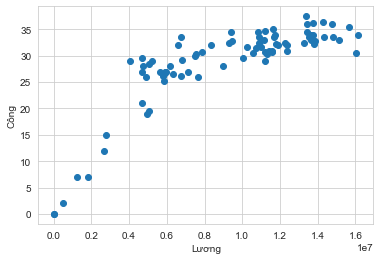

In [48]:
# Vẽ biểu đồ scatter plot tương quan giữa lương chốt và tổng công
import matplotlib.pyplot as plt
plt.scatter(df['Lương Chốt'], df['Tổng công'])
plt.xlabel('Lương')
plt.ylabel('Công')
plt.show()


In [49]:
# Tính toán hệ số tương quan
import numpy as np
corr_coef = np.corrcoef(df['Lương Chốt'], df['Tổng công'])
print(corr_coef)

[[1.         0.80620872]
 [0.80620872 1.        ]]


Tổng công và lương chốt có mối quan hệ tương đối mạnh với nhau. Việc tăng tổng công có thể dẫn đến tăng lương chốt và ngược lại, sự giảm tổng công có thể dẫn đến giảm lương chốt.

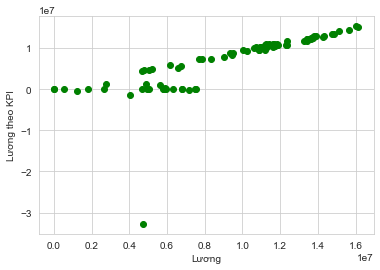

In [54]:
# Vẽ biểu đồ scatter plot tương quan giữa lương theo KPI và lương chốt
import matplotlib.pyplot as plt
plt.scatter(df['Lương Chốt'],df['Lương Theo Kpi'],c = 'green')
plt.xlabel('Lương')
plt.ylabel('Lương theo KPI')
plt.show()

In [55]:
# Tính toán hệ số tương quan
import numpy as np
corr_coef = np.corrcoef(df['Lương Chốt'], df['Lương Theo Kpi'])
print(corr_coef)

[[1.         0.77829068]
 [0.77829068 1.        ]]


Nhìn chung, có sự tương quan chặt chẽ giữa lương theo KPI và tổng lương chốt cuối cùng, hệ số tương quan là 0.778. Điều này cho thấy việc áp KPI đã tác động mạnh mẽ tới năng suất làm việc và khoản thu nhập của nhân viên

# 5. Phân phối tiền lương của nhân viên CSKH

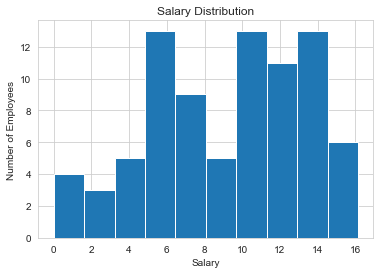

In [63]:
# Biểu đồ dạng histogram của hiệu suất làm việc
plt.hist(df['Lương Chốt']/1000000)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

Mức lương trung bình ở của nhân chăm sóc khách hàng sẽ rơi vào khoảng từ 10 - 14 triệu. Có một số thấp hơn khoảng 6-8,
điều này có thể do nhân viên mới chưa đạt đủ KPI cũng như bị phạt chat chậm, ngoài ra có một số tương đối lớn đạt 
khoảng 15 - 16, đây là số người đã quen việc và có lương KPI tốt